# 0. Importing libraries

In [1]:
import os
import sys
sys.path.append("../pypsa-eur")
import pypsa
os.chdir("C:\\Users\\Yerbol\\Documents\\Python\\PyPSA\\PyPSA-Eur\\pypsa-eur")
import pypsa
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import logging
import colors as c
import warnings

warnings.filterwarnings("ignore")
logger = logging.getLogger(__name__)
plt.style.use("ggplot")

# 1. Define functions

In [2]:
# renaming function
def rename_techs(label):
    prefix_to_remove = [
        "residential ",
        "services ",
        "urban ",
        "rural ",
        "central ",
        "decentral ",
    ]

    rename_if_contains = [
        "solid biomass CHP",
        "gas CHP",
        "gas boiler",
        "biogas",
        "solar thermal",
        "air heat pump",
        "ground heat pump",
        "resistive heater",
        "Fischer-Tropsch",
    ]

    rename_if_contains_dict = {
        "water tanks": "TES",
        "retrofitting": "building retrofitting",
        # "H2 Electrolysis": "hydrogen storage",
        # "H2 Fuel Cell": "hydrogen storage",
        # "H2 pipeline": "hydrogen storage",
        "battery": "battery storage",
        # "CC": "CC"
    }

    rename = {
        "Solar": "solar PV",
        "Sabatier": "methanation",
        "helmeth" : "methanation",
        "Offshore Wind (AC)": "offshore wind",
        "Offshore Wind (DC)": "offshore wind",
        "Onshore Wind": "onshore wind",
        "Run of River": "hydroelectricity",
        "Reservoir & Dam": "hydroelectricity",
        "Pumped Hydro Storage": "hydroelectricity",
        "NH3": "ammonia",
        "co2 Store": "DAC",
        "co2 stored": "CO2 sequestration",
        "AC": "transmission lines",
        "DC": "transmission lines",
        "B2B": "transmission lines",
        "solid biomass for industry": "solid biomass",
        "solid biomass for industry CC": "solid biomass",
        "electricity distribution grid": "distribution lines",
        "Open-Cycle Gas":"OCGT",
        "gas": "gas storage",
        'gas pipeline new': 'gas pipeline',
        "gas for industry CC": "gas for industry",
        "SMR CC": "SMR",
        "process emissions CC": "process emissions",
        "Battery Storage": "battery storage",
        'H2 Store': "H2 storage",
        
    }

    for ptr in prefix_to_remove:
        if label[: len(ptr)] == ptr:
            label = label[len(ptr) :]

    for rif in rename_if_contains:
        if rif in label:
            label = rif

    for old, new in rename_if_contains_dict.items():
        if old in label:
            label = new

    for old, new in rename.items():
        if old == label:
            label = new
    return label


preferred_order = pd.Index(
    [
        "solid biomass",
        "biogas",
        "gas for industry",
        "methanol",
        "oil",
        
        "transmission lines",
        "distribution lines",
        "gas pipeline",
        "H2 pipeline",
        
        "H2 Electrolysis",
        "H2 Fuel Cell",
        "DAC",
        "Fischer-Tropsch",
        "methanation",
        "BEV charger",
        "V2G",
        "SMR",
        "methanolisation",
        
        "battery storage",
        "gas storage",
        "H2 storage",
        "TES",
        
        "hydroelectricity",
        "OCGT",
        "onshore wind",
        "offshore wind",
        "solar PV",
        "solar thermal",
        "solar rooftop",

        "gas CHP",
        "solid biomass CHP",
        "resistive heater",
        "air heat pump",
        "ground heat pump",
        "gas boiler",
        "biomass boiler",
        "building retrofitting",
        
        "co2",
        "CO2 sequestration",
        "process emissions"
     ]
)

In [3]:
# renaming function
def rename_techs2(label):
    prefix_to_remove = [
        "residential ",
        "services ",
        "urban ",
        "rural ",
        "central ",
        "decentral ",
    ]

    rename_if_contains = [
        "solid biomass CHP",
        "gas CHP",
        "gas boiler",
        "biogas",
        "solar thermal",
        "air heat pump",
        "ground heat pump",
        "resistive heater",
        "Fischer-Tropsch",
    ]

    rename_if_contains_dict = {
        "water tanks": "water tanks discharger",
        "retrofitting": "building retrofitting",
        # "H2 Electrolysis": "hydrogen storage",
        # "H2 Fuel Cell": "hydrogen storage",
        # "H2 pipeline": "hydrogen storage",
        "battery": "battery storage",
        # "CC": "CC"
    }

    rename = {
        "Solar": "solar PV",
        "Sabatier": "methanation",
        "helmeth" : "methanation",
        "Offshore Wind (AC)": "offshore wind",
        "Offshore Wind (DC)": "offshore wind",
        "Onshore Wind": "onshore wind",
        "Run of River": "hydroelectricity",
        "Reservoir & Dam": "hydroelectricity",
        "Pumped Hydro Storage": "hydroelectricity",
        "NH3": "ammonia",
        "co2 Store": "DAC",
        "co2 stored": "CO2 sequestration",
        "AC": "transmission lines",
        "DC": "transmission lines",
        "B2B": "transmission lines",
        "solid biomass for industry": "solid biomass",
        "solid biomass for industry CC": "solid biomass",
        "electricity distribution grid": "distribution lines",
        "Open-Cycle Gas":"OCGT",
        "gas": "gas storage",
        'gas pipeline new': 'gas pipeline',
        "gas for industry CC": "gas for industry",
        "SMR CC": "SMR",
        "process emissions CC": "process emissions",
        "Battery Storage": "battery storage",
        'H2 Store': "H2 storage",
        
    }

    for ptr in prefix_to_remove:
        if label[: len(ptr)] == ptr:
            label = label[len(ptr) :]

    for rif in rename_if_contains:
        if rif in label:
            label = rif

    for old, new in rename_if_contains_dict.items():
        if old in label:
            label = new

    for old, new in rename.items():
        if old == label:
            label = new
    return label


preferred_order = pd.Index(
    [
        "solid biomass",
        "biogas",
        "gas for industry",
        "methanol",
        "oil",
        
        "transmission lines",
        "distribution lines",
        "gas pipeline",
        "H2 pipeline",
        
        "H2 Electrolysis",
        "H2 Fuel Cell",
        "DAC",
        "Fischer-Tropsch",
        "methanation",
        "BEV charger",
        "V2G",
        "SMR",
        "methanolisation",
        
        "battery storage",
        "gas storage",
        "H2 storage",
        "water tanks discharger",
        
        "hydroelectricity",
        "OCGT",
        "onshore wind",
        "offshore wind",
        "solar PV",
        "solar thermal",
        "solar rooftop",
        
        "building retrofitting",
        "solid biomass CHP",
        "gas CHP",
        "biomass boiler",
        "gas boiler",
        "resistive heater",
        "air heat pump",
        "ground heat pump",
        
        "co2",
        "CO2 sequestration",
        "process emissions"
     ]
)

# 1. Loading the networks

In [4]:
FILE = "elec_s_48_lcopt__Co2L0-2H-T-H-B_2030.nc"
DIR = "results/rigid5/postnetworks"
n_rigid = pypsa.Network(os.path.join(DIR, FILE))

Index(['biomass transport AL1 0 -> GR1 0', 'biomass transport AL1 0 -> ME1 0',
       'biomass transport AL1 0 -> MK1 0', 'biomass transport AL1 0 -> RS1 0',
       'biomass transport AT1 0 -> CH1 0', 'biomass transport AT1 0 -> CZ1 0',
       'biomass transport AT1 0 -> DE1 0', 'biomass transport AT1 0 -> DE1 3',
       'biomass transport AT1 0 -> HU1 0', 'biomass transport AT1 0 -> IT1 0',
       ...
       'biomass transport LV6 0 -> LT6 0', 'biomass transport PL1 0 -> LT6 0',
       'biomass transport SE2 0 -> LT6 0', 'biomass transport RS1 0 -> ME1 0',
       'biomass transport RS1 0 -> MK1 0', 'biomass transport NO2 0 -> NL1 0',
       'biomass transport SE2 0 -> NO2 0', 'biomass transport SE2 0 -> PL1 0',
       'biomass transport SK1 0 -> PL1 0', 'biomass transport RS1 0 -> RO1 0'],
      dtype='object', name='name', length=204)
Index(['biomass transport AL1 0 -> GR1 0', 'biomass transport AL1 0 -> ME1 0',
       'biomass transport AL1 0 -> MK1 0', 'biomass transport AL1 0 -> R

In [5]:
FILE = "elec_s_48_lcopt__Co2L0-2H-T-H-B_2030.nc"
DIR = "results/flexible2/postnetworks"
n_flex = pypsa.Network(os.path.join(DIR, FILE))

Index(['biomass transport AL1 0 -> GR1 0', 'biomass transport AL1 0 -> ME1 0',
       'biomass transport AL1 0 -> MK1 0', 'biomass transport AL1 0 -> RS1 0',
       'biomass transport AT1 0 -> CH1 0', 'biomass transport AT1 0 -> CZ1 0',
       'biomass transport AT1 0 -> DE1 0', 'biomass transport AT1 0 -> DE1 3',
       'biomass transport AT1 0 -> HU1 0', 'biomass transport AT1 0 -> IT1 0',
       ...
       'biomass transport LV6 0 -> LT6 0', 'biomass transport PL1 0 -> LT6 0',
       'biomass transport SE2 0 -> LT6 0', 'biomass transport RS1 0 -> ME1 0',
       'biomass transport RS1 0 -> MK1 0', 'biomass transport NO2 0 -> NL1 0',
       'biomass transport SE2 0 -> NO2 0', 'biomass transport SE2 0 -> PL1 0',
       'biomass transport SK1 0 -> PL1 0', 'biomass transport RS1 0 -> RO1 0'],
      dtype='object', name='name', length=204)
Index(['biomass transport AL1 0 -> GR1 0', 'biomass transport AL1 0 -> ME1 0',
       'biomass transport AL1 0 -> MK1 0', 'biomass transport AL1 0 -> R

In [6]:
FILE = "elec_s_48_lcopt__Co2L0-2H-T-H-B_2030.nc"
DIR = "results/igas_tes/postnetworks"
n_igas_tes = pypsa.Network(os.path.join(DIR, FILE))

Index(['biomass transport AL1 0 -> GR1 0', 'biomass transport AL1 0 -> ME1 0',
       'biomass transport AL1 0 -> MK1 0', 'biomass transport AL1 0 -> RS1 0',
       'biomass transport AT1 0 -> CH1 0', 'biomass transport AT1 0 -> CZ1 0',
       'biomass transport AT1 0 -> DE1 0', 'biomass transport AT1 0 -> DE1 3',
       'biomass transport AT1 0 -> HU1 0', 'biomass transport AT1 0 -> IT1 0',
       ...
       'biomass transport LV6 0 -> LT6 0', 'biomass transport PL1 0 -> LT6 0',
       'biomass transport SE2 0 -> LT6 0', 'biomass transport RS1 0 -> ME1 0',
       'biomass transport RS1 0 -> MK1 0', 'biomass transport NO2 0 -> NL1 0',
       'biomass transport SE2 0 -> NO2 0', 'biomass transport SE2 0 -> PL1 0',
       'biomass transport SK1 0 -> PL1 0', 'biomass transport RS1 0 -> RO1 0'],
      dtype='object', name='name', length=204)
Index(['biomass transport AL1 0 -> GR1 0', 'biomass transport AL1 0 -> ME1 0',
       'biomass transport AL1 0 -> MK1 0', 'biomass transport AL1 0 -> R

In [7]:
network = {"rigid":n_rigid, "igas+tes":n_igas_tes, "flexible":n_flex}

# 2. Total System Cost estimation (Fig. 5)

## 2A. Cost estimation

In [9]:
costs_rigid = n_rigid.statistics()[["Capital Expenditure", "Operational Expenditure"]].dropna()
full_costs_rigid = costs_rigid.sum(axis=1).droplevel(0).to_frame()
full_costs_rigid.columns = ["rigid"]

In [10]:
costs_flex = n_flex.statistics()[["Capital Expenditure", "Operational Expenditure"]].dropna()
full_costs_flex = costs_flex.sum(axis=1).droplevel(0).to_frame()
full_costs_flex.columns = ["flexible"]

In [11]:
costs_igas_tes = n_igas_tes.statistics()[["Capital Expenditure", "Operational Expenditure"]].dropna()
full_costs_igas_tes = costs_igas_tes.sum(axis=1).droplevel(0).to_frame()
full_costs_igas_tes.columns = ["igas+tes"]

In [12]:
cost_df = full_costs_flex.join(full_costs_igas_tes).join(full_costs_rigid).fillna(0)
cost_df

,flexible,igas+tes,rigid
carrier,,,
BEV charger,1.090885e+03,1.099304e+03,1.112770e+03
Battery Storage,1.616675e+05,1.172398e+06,3.348888e+06
DAC,9.457050e+04,1.000357e+06,1.045779e+08
DC,9.004292e+09,9.442822e+09,1.096155e+10
H2 Electrolysis,5.510977e+09,5.718814e+09,4.464175e+09
...,...,...,...
urban central solid biomass CHP,1.507883e+10,1.507877e+10,6.713297e+09
urban central solid biomass CHP CC,1.528177e+10,1.545075e+10,2.311760e+10
urban central water tanks,8.095339e+08,8.139603e+08,0.000000e+00


## 2B. Plot 

INFO:__main__:Dropping technology with costs below 0.5 EUR billion per year
INFO:__main__:Total system cost of flexible    425.0
igas+tes    424.0
rigid       489.0
dtype: float64 EUR billion per year


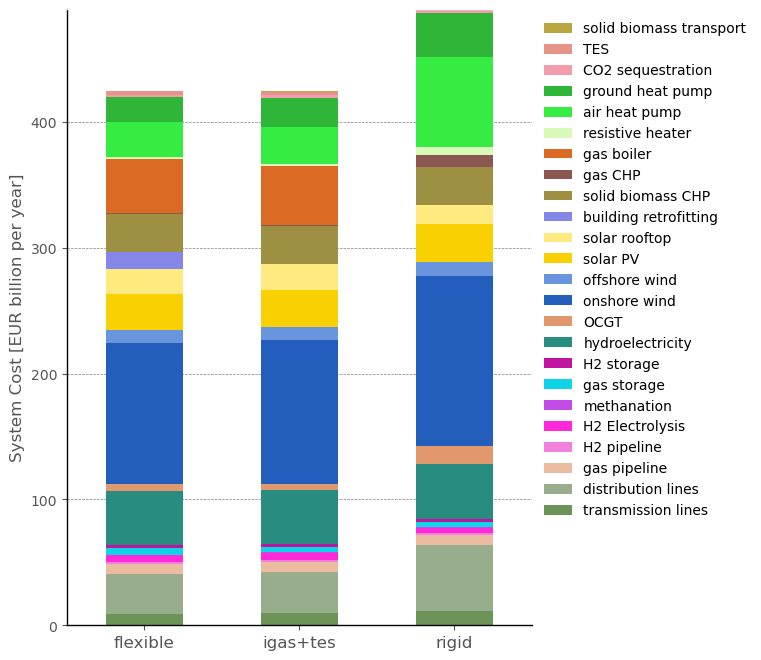

In [34]:
def plot_costs(cost_df):
    df = cost_df.groupby(cost_df.index).sum()

    # convert to billions
    df = df / 1e9
    df = df.groupby(df.index.map(rename_techs)).sum()

    costs_threshold = 0.5
    to_drop = df.index[df.max(axis=1) < costs_threshold]  #df <

    logger.info(
        f"Dropping technology with costs below {costs_threshold} EUR billion per year"
    )
    logger.debug(df.loc[to_drop])

    df = df.drop(to_drop)

    logger.info(f"Total system cost of {round(df.sum())} EUR billion per year")

    new_index = preferred_order.intersection(df.index).append(
        df.index.difference(preferred_order)
    )

    new_columns = df.sum().sort_values().index  


    fig, ax = plt.subplots(figsize=(6, 8))

    df.loc[new_index].T.plot(
        kind="bar",
        ax=ax,
        stacked=True,
        color=[c.tech_colors[i] for i in new_index],
    )

    handles, labels = ax.get_legend_handles_labels()

    handles.reverse()
    labels.reverse()

    costs_max = cost_df.sum().max() / 1e9
    ax.set_ylim([0, costs_max])
    plt.xticks(rotation=0, fontsize=12)

    ax.set_ylabel("System Cost [EUR billion per year]")

    ax.set_xlabel("")

    ax.grid(axis="x")

    ax.legend(
        handles, labels, ncol=1, loc="upper left", bbox_to_anchor=[1, 1], frameon=False
    )
    
    ax.set_facecolor('white')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
    plt.show()
    
    
plot_costs(cost_df)

# 3. Installed peak capacituies (Fig. 6)

## 3A. Calculation

In [14]:
common_rural_techs = ["solar thermal", "ground heat pump", "resistive heater", 
                      "gas boiler", "water tanks discharger" ]#, "biomass boiler" ]
common_urban_techs = ["solar thermal", "air heat pump", "resistive heater", 
                      "gas boiler", "water tanks discharger"] #, "biomass boiler" ]
urban_central_techs = ["solar thermal", "air heat pump", "resistive heater", 
                       "gas boiler", "gas CHP", "gas CHP CC", 
                       "solid biomass CHP","solid biomass CHP CC", "water tanks discharger"]

In [15]:
techs = {"residential rural":["residential rural "+ x for x in common_rural_techs],
         "services rural":["services rural "+ x for x in common_rural_techs],
         "residential urban decentral":["residential urban decentral "+ x for x in common_urban_techs],
         "services urban decentral":["services urban decentral "+ x for x in common_urban_techs],
         "urban central":["urban central "+ x for x in urban_central_techs]+["H2 Fuel Cell"]#, "Fischer-Tropsch"]
        }

In [16]:
techs

{'residential rural': ['residential rural solar thermal',
  'residential rural ground heat pump',
  'residential rural resistive heater',
  'residential rural gas boiler',
  'residential rural water tanks discharger'],
 'services rural': ['services rural solar thermal',
  'services rural ground heat pump',
  'services rural resistive heater',
  'services rural gas boiler',
  'services rural water tanks discharger'],
 'residential urban decentral': ['residential urban decentral solar thermal',
  'residential urban decentral air heat pump',
  'residential urban decentral resistive heater',
  'residential urban decentral gas boiler',
  'residential urban decentral water tanks discharger'],
 'services urban decentral': ['services urban decentral solar thermal',
  'services urban decentral air heat pump',
  'services urban decentral resistive heater',
  'services urban decentral gas boiler',
  'services urban decentral water tanks discharger'],
 'urban central': ['urban central solar therma

In [17]:
cap_full = pd.DataFrame(columns=["rigid", "tes", "igas", "igas+tes", "retro", "retro+tes", "retro+igas", "flexible"])
gen_full = pd.DataFrame(columns=["rigid", "tes", "igas", "igas+tes", "retro", "retro+tes", "retro+igas", "flexible"])
cap_full

,rigid,tes,igas,igas+tes,retro,retro+tes,retro+igas,flexible


In [18]:
# Calculation of installed capacities and generation
for name, n in network.items():
    print("Case: ", name)
    for r in techs:
        for i in techs[r]:
            gens_cap = n.generators.filter(like=i, axis=0).p_nom_opt
            links_cap = n.links.filter(like=i, axis=0).p_nom_opt
            if not gens_cap.empty:
                cap_full.loc[i, name] = gens_cap.sum()
            if not links_cap.empty:
                cap_full.loc[i, name] = links_cap.sum()
                
            gens_gen = n.generators_t.p.filter(like=i, axis=1).multiply(n_rigid.snapshot_weightings.generators,axis=0)
            if "CHP" in i or "Fuel Cell" in i:
                links_gen = -n.links_t.p2.filter(like=i, axis=1).multiply(n_rigid.snapshot_weightings.stores,axis=0)
            elif "Fischer-Tropsch" in i:
                links_gen = -n.links_t.p3.filter(like=i, axis=1).multiply(n_rigid.snapshot_weightings.stores,axis=0)
            else:
                links_gen = -n.links_t.p1.filter(like=i, axis=1).multiply(n_rigid.snapshot_weightings.stores,axis=0)  # for all links excep Fischer-Tropsch, H2 Fuel Cell, and CHPs
            # gas CHP bus2 
            if not gens_gen.empty:
                gen_full.loc[i, name] = gens_gen.sum().sum()
            if not links_gen.empty:
                gen_full.loc[i, name] = links_gen.sum().sum()
print(cap_full)
print(gen_full)

Case:  rigid
Case:  igas+tes
Case:  flexible
                                                            rigid  tes igas   
residential rural solar thermal                         13.724352  NaN  NaN  \
residential rural ground heat pump                   50927.001288  NaN  NaN   
residential rural resistive heater                  114583.784631  NaN  NaN   
services rural solar thermal                            12.362986  NaN  NaN   
services rural ground heat pump                      19074.448582  NaN  NaN   
services rural resistive heater                      51154.153401  NaN  NaN   
residential urban decentral solar thermal               15.473735  NaN  NaN   
residential urban decentral air heat pump           152041.464047  NaN  NaN   
residential urban decentral resistive heater        390761.545879  NaN  NaN   
services urban decentral solar thermal                  15.566337  NaN  NaN   
services urban decentral air heat pump               61949.577947  NaN  NaN   
service

## 3B. Plot

INFO:__main__:Total installed capacity of [235   0   0 366   0   0   0 301] GW
INFO:__main__:Total Generation of [890   0   0 946   0   0   0 810] TWh
INFO:__main__:Total installed capacity of [781   0   0 990   0   0   0 935] GW
INFO:__main__:Total Generation of [2157    0    0 2259    0    0    0 2159] TWh
INFO:__main__:Total installed capacity of [676   0   0 718   0   0   0 780] GW
INFO:__main__:Total Generation of [1335    0    0 2003    0    0    0 1959] TWh


Text(0, 0.5, 'generation [TWh]')

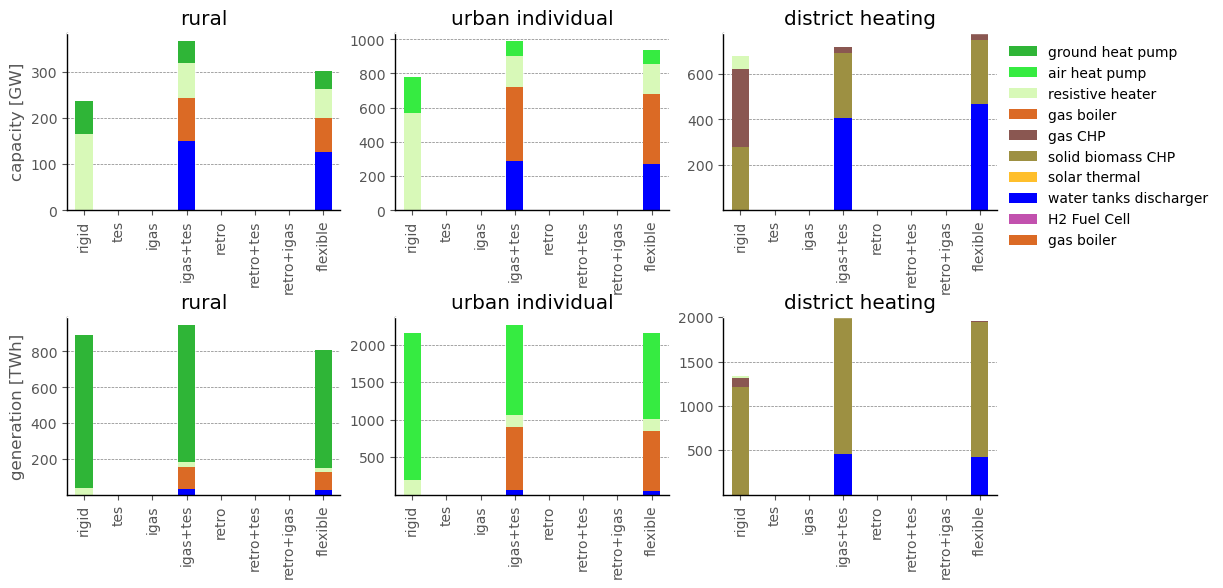

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.6)
zones = {"rural":"rural", "urban individual":"urban decentral", "district heating":"urban central"}
k = 0
for nice_name, tech_name in zones.items():
    cur_zones = [x for x in techs.keys() if tech_name in x]  # eg. residential rural, services rural
    list_tech = [techs[x] for x in cur_zones]  # list of technology lists
    cur_techs = [t for sublist in list_tech for t in sublist]  # list of technologies
    
    cf = cap_full.loc[cur_techs,:] / 1e3
    cf = cf.groupby(cf.index.map(rename_techs2)).sum()
    logger.info(f"Total installed capacity of {cf.sum().astype(int).values} GW")
    
    gf = gen_full.loc[cur_techs, :] / 1e6
    gf = gf.groupby(gf.index.map(rename_techs2)).sum()
    logger.info(f"Total Generation of {gf.sum().astype(int).values} TWh")
    
    
    new_index = preferred_order.intersection(cf.index).append(
        cf.index.difference(preferred_order)
    )
    
    cf.loc[new_index].T.plot(
        kind="bar",
        ax=axs[0,k],
        stacked=True,
        color=[c.tech_colors[i] for i in new_index],
        legend=False,
        title = nice_name
    )
    gf.loc[new_index].T.plot(
        kind="bar",
        ax=axs[1,k],
        stacked=True,
        color=[c.tech_colors[i] for i in new_index],
        legend=False,
        title = nice_name
    )
    
    axs[0,k].set_facecolor('white')
    axs[0,k].spines['left'].set_color('black')
    axs[0,k].spines['bottom'].set_color('black')
    axs[0,k].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
    axs[1,k].set_facecolor('white')
    axs[1,k].spines['left'].set_color('black')
    axs[1,k].spines['bottom'].set_color('black')
    axs[1,k].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
    k += 1


handles1, labels1 = axs[0,0].get_legend_handles_labels()
handles2, labels2 = axs[0,2].get_legend_handles_labels()

handles = handles1[2:3] + handles2 + handles1[-1:]
labels = labels1[2:3] + labels2 + labels1[-1:]

handles.reverse()
labels.reverse()

axs[0,2].legend(
    handles, labels, ncol=1, loc="upper left", bbox_to_anchor=[1, 1], frameon=False
)
axs[0, 0].set_ylabel("capacity [GW]")
axs[1, 0].set_ylabel("generation [TWh]")


# 4.Heat supply profile (Fig. 7) 

## 4A. Estimation and plot

In [20]:
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

In [21]:
first_date = "2013-01-10"
second_date = "2013-01-17"
bus = "RO1 0"

In [22]:
techs

{'residential rural': ['residential rural solar thermal',
  'residential rural ground heat pump',
  'residential rural resistive heater',
  'residential rural gas boiler',
  'residential rural water tanks discharger'],
 'services rural': ['services rural solar thermal',
  'services rural ground heat pump',
  'services rural resistive heater',
  'services rural gas boiler',
  'services rural water tanks discharger'],
 'residential urban decentral': ['residential urban decentral solar thermal',
  'residential urban decentral air heat pump',
  'residential urban decentral resistive heater',
  'residential urban decentral gas boiler',
  'residential urban decentral water tanks discharger'],
 'services urban decentral': ['services urban decentral solar thermal',
  'services urban decentral air heat pump',
  'services urban decentral resistive heater',
  'services urban decentral gas boiler',
  'services urban decentral water tanks discharger'],
 'urban central': ['urban central solar therma

Case:  rigid
Case:  igas+tes
Case:  flexible


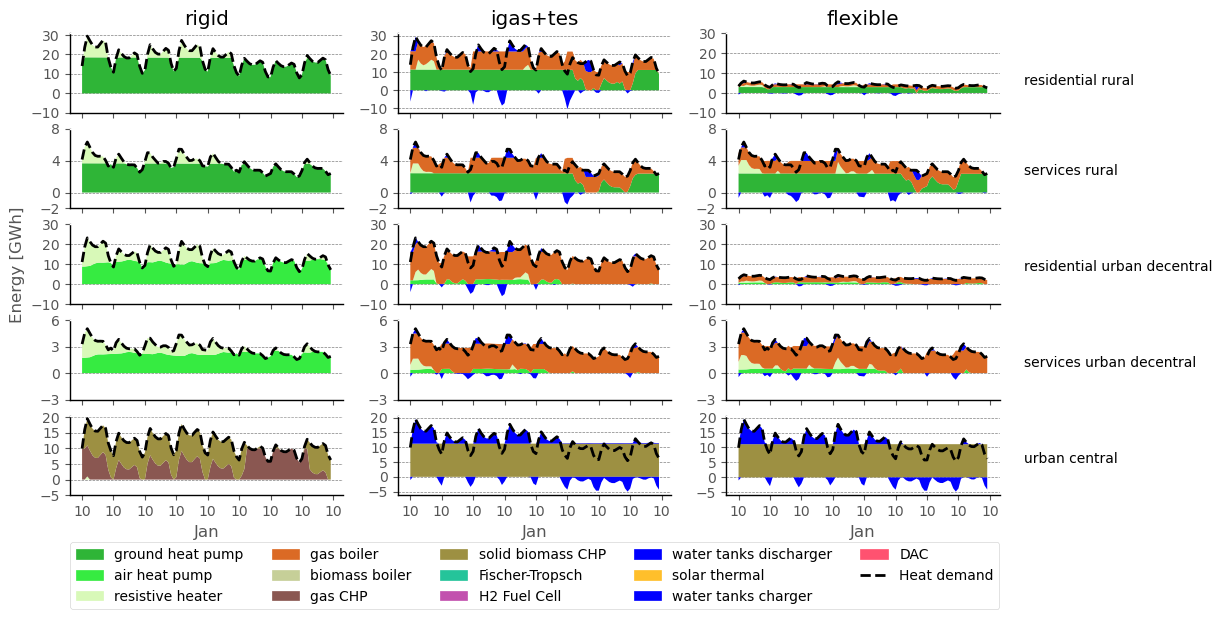

In [23]:
network_small = {"rigid":n_rigid, "igas+tes":n_igas_tes, "flexible":n_flex}
fig, axs = plt.subplots(5, 3, figsize=(12, 6))
i = 0

for name, n in network_small.items():
    print("Case: ", name)
    j = 0
    for r in techs:
        current_technologies = techs[r]
        
        time = n.generators_t.p.multiply(n.snapshot_weightings.generators, 
                                              axis=0).loc[first_date:second_date].index
        
        solar_gen = pd.Series(index=time).fillna(0)
        fischer_gen = pd.Series(index=time).fillna(0)
        gas_CHP_gen = pd.Series(index=time).fillna(0)
        biomass_CHP_gen = pd.Series(index=time).fillna(0)
        fuel_cell_gen = pd.Series(index=time).fillna(0)
        ground_heat_gen = pd.Series(index=time).fillna(0)
        air_heat_gen = pd.Series(index=time).fillna(0)
        res_heater_gen = pd.Series(index=time).fillna(0)
        gas_boiler_gen = pd.Series(index=time).fillna(0)
        biomass_boiler_gen = pd.Series(index=time).fillna(0)
        water_dischar_gen = pd.Series(index=time).fillna(0)
        
        
#         idx_gen = n.generators.query("carrier in @curent_technologies").filter(like=bus, axis=0).index
#         idx_link = n.links.query("carrier in @curent_technologies").filter(like=bus, axis=0).index
        
        
    
        # generation of solar thermal collectors
        solar_gen = n.generators_t.p.multiply(n.snapshot_weightings.generators, 
                                              axis=0).loc[first_date:second_date].filter(like=bus).filter(like="solar thermal").filter(like=r).squeeze().fillna(0)
        if solar_gen.empty:
            solar_gen = pd.Series(index=time).fillna(0)
            
        if r == "urban central":
            # generation of Fischer-Tropsch
            fischer_gen = -n.links_t.p3.multiply(n.snapshot_weightings.stores, 
                                                 axis=0).loc[first_date:second_date].filter(like=bus).filter(like="Fischer").squeeze().fillna(0)
            if fischer_gen.empty:
                fischer_gen = pd.Series(index=time).fillna(0)
            
            # generation of gas CHP
            gas_CHP_gen = -n.links_t.p2.multiply(n.snapshot_weightings.stores,
                                                 axis=0).loc[first_date:second_date].filter(like=bus).filter(like="gas CHP").sum(axis=1).squeeze().fillna(0)
            if gas_CHP_gen.empty:
                gas_CHP_gen = pd.Series(index=time).fillna(0)
                
            # generation of solid biomass CHP
            biomass_CHP_gen = -n.links_t.p2.multiply(n.snapshot_weightings.stores, 
                                                     axis=0).loc[first_date:second_date].filter(like=bus).filter(like="biomass CHP").sum(axis=1).squeeze().fillna(0)
            if biomass_CHP_gen.empty:
                biomass_CHP_gen = pd.Series(index=time).fillna(0)
                
            # generation of Fuel Cell
            fuel_cell_gen = -n.links_t.p2.multiply(n.snapshot_weightings.stores,
                                                   axis=0).loc[first_date:second_date].filter(like=bus).filter(like="Fuel Cell").squeeze().fillna(0)
            if fuel_cell_gen.empty:
                fuel_cell_gen = pd.Series(index=time).fillna(0)
        
        # generation of ground heat pump
        ground_heat_gen = -n.links_t.p1.multiply(n.snapshot_weightings.stores,
                                                 axis=0).loc[first_date:second_date].filter(like=bus).filter(like="ground heat pump").filter(like=r).squeeze()
        if ground_heat_gen.empty:
            ground_heat_gen = pd.Series(index=time).fillna(0)
        
        # generation of air heat pump
        air_heat_gen = -n.links_t.p1.multiply(n.snapshot_weightings.stores,
                                              axis=0).loc[first_date:second_date].filter(like=bus).filter(like="air heat pump").filter(like=r).squeeze()
        if air_heat_gen.empty:
            air_heat_gen = pd.Series(index=time).fillna(0)
        
        # generation of resistive heater
        res_heater_gen = -n.links_t.p1.multiply(n.snapshot_weightings.stores,
                                                axis=0).loc[first_date:second_date].filter(like=bus).filter(like="resistive heater").filter(like=r).squeeze().fillna(0)
        if res_heater_gen.empty:
            res_heater_gen = pd.Series(index=time).fillna(0)
        
        # generation of gas boiler
        gas_boiler_gen = -n.links_t.p1.multiply(n.snapshot_weightings.stores,
                                                axis=0).loc[first_date:second_date].filter(like=bus).filter(like="gas boiler").filter(like=r).squeeze().fillna(0)
        if gas_boiler_gen.empty:
            gas_boiler_gen = pd.Series(index=time).fillna(0)

        # generation of biomass boiler
        biomass_boiler_gen = -n.links_t.p1.multiply(n.snapshot_weightings.stores,
                                                    axis=0).loc[first_date:second_date].filter(like=bus).filter(like="biomass boiler").filter(like=r).squeeze().fillna(0)
        if biomass_boiler_gen.empty:
            biomass_boiler_gen = pd.Series(index=time).fillna(0)

        # generation of water tanks discharger
        water_dischar_gen = -n.links_t.p1.multiply(n.snapshot_weightings.stores,
                                                   axis=0).loc[first_date:second_date].filter(like=bus).filter(like="water tanks discharger").filter(like=r).squeeze().fillna(0)
        if water_dischar_gen.empty:
            water_dischar_gen = pd.Series(index=time).fillna(0)
            
        # storage of water tanks charger
        water_char_store = n.links_t.p1.multiply(n.snapshot_weightings.stores,
                                                 axis=0).loc[first_date:second_date].filter(like=bus).filter(like="water tanks charger").filter(like=r).squeeze().fillna(0)
        if water_char_store.empty:
            water_char_store = pd.Series(index=time).fillna(0)
            
        # heat to DAC
        dac_need = n.links_t.p1.multiply(n.snapshot_weightings.stores,
                                         axis=0).loc[first_date:second_date].filter(like=bus).filter(like="DAC").filter(like=r).squeeze().fillna(0)
        if dac_need.empty:
            dac_need = pd.Series(index=time).fillna(0)
 

        # heat demand
        heat_demand = n.loads_t.p_set.multiply(n.snapshot_weightings.generators,
                                                   axis=0).loc[first_date:second_date].filter(like=bus).filter(like=r).squeeze().fillna(0)
        retrofit = n.generators_t.p.multiply(n.snapshot_weightings.generators,
                                             axis=0).loc[first_date:second_date].filter(like=bus).filter(like="retrofitting").filter(like=r).sum(axis=1).squeeze().fillna(0)
        if retrofit.empty:
            retrofit = pd.Series(index=time).fillna(0)
        total_heat_demand = heat_demand - retrofit
        
        # technologies
        items = ["ground heat pump", "air heat pump", "resistive heater",
                 "gas boiler", "biomass boiler", "gas CHP", "solid biomass CHP",
                 "Fischer-Tropsch", "H2 Fuel Cell", "water tanks discharger", "solar thermal"]
        # stacked plot for supply
        axs[j,i].stackplot(time, ground_heat_gen/1e3, air_heat_gen/1e3, res_heater_gen/1e3, 
                          gas_boiler_gen/1e3, biomass_boiler_gen/1e3, gas_CHP_gen/1e3, biomass_CHP_gen/1e3, 
                          fischer_gen/1e3, fuel_cell_gen/1e3, water_dischar_gen/1e3, solar_gen/1e3,
                          colors=[c.tech_colors[i] for i in items], zorder = 3)
        # stacked plot for demand
        axs[j,i].stackplot(time, water_char_store/1e3, dac_need/1e3,
                          colors=[c.tech_colors[i] for i in ["water tanks charger", "DAC"]], zorder = 3)
        # heat demand - retrofit
        line1, = axs[j,i].plot(time, total_heat_demand/1e3, '--', color='#000000', linewidth=2, label="Heat demand", zorder=10)
        
        
        # heat demand
#         line2, = axs[j,i].plot(time, 12*heat_demand/1e3, '--', color='#000000', linewidth=2, label="Heat demand", zorder=11)
        
        j += 1  # plot next graph
        
        # configuration of axis
        if j<5:
            axs[j-1,i].set_xticklabels([])
        axs[4,i].set_xticklabels(labels=time.day)
        axs[4,i].set_xlabel("Jan")
        axs[0,i].set_yticks([-10,0,10,20,30]) # limits and ticks for row 1
        axs[1,i].set_yticks([-2,0,4,8]) # limits and ticks for row 2
        axs[2,i].set_yticks([-10,0,10,20,30]) # limits and ticks for row 3
        axs[3,i].set_yticks([-3,0,3,6]) # limits and ticks for row 4
        axs[4,i].set_yticks([-5,0,5,10,15,20]) # limits and ticks for row 1
        axs[0,i].set_title(name)
        axs[j-1,i].set_facecolor('white')
        axs[j-1,i].spines['left'].set_color('black')
        axs[j-1,i].spines['bottom'].set_color('black')
        axs[j-1,i].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
        
        if i==0:
            yloc = [0.8, 0.65, 0.49, 0.33, 0.17]
            plt.gcf().text(0.92, yloc[j-1], f'{r}', fontsize=10, va='center')
         
    i += 1

handles = []
for i in items + ["water tanks charger", "DAC"]:
    current_patch = mpatches.Patch(color=c.tech_colors[i], label=i)
    handles.append(current_patch)
handles.append(line1)
lgd = axs[4,1].legend(handles=handles, loc="upper center", bbox_to_anchor=(0.5, -0.5), ncol=5, facecolor="white")
ylabel = axs[2,0].set_ylabel("Energy [GWh]")



    



# 5. Heat demand saved per country (Fig. 8)

## A. Importing shapes

In [24]:
# set a custom path to `resources` folder
resources_path = "./resources/rigid5"
# onshore and offshore shapes
onshore_cl_fl = os.path.join(resources_path, "regions_onshore_elec_s_48.geojson")
# read onshore shapes
onshore_cl_df = gpd.read_file(onshore_cl_fl)

## B. Prepare dataframes and plot

In [25]:
heat_demand = n_rigid.loads_t.p_set.multiply(n.snapshot_weightings.generators,
                                             axis=0).filter(like="heat").groupby(n.buses.location, 
                                                                                 axis=1).sum().sum().iloc[1:].to_frame()
heat_demand.columns = ["heat demand"]
heat_demand.reset_index(inplace=True)
heat_demand.rename(columns={"location":"name"}, inplace=True)
heat_demand.head()

,name,heat demand
0,AT1 0,8.026066e+07
1,BA1 0,8.100415e+06
2,BE1 0,1.122079e+08
3,BG1 0,2.756841e+07
4,CH1 0,7.197741e+07


In [26]:
data_gdf = pd.concat([onshore_cl_df, heat_demand], axis=1, join="inner")
data_gdf = data_gdf.loc[:,~data_gdf.columns.duplicated()]
data_gdf.head()

,name,geometry,heat demand
0,AL1 0,"POLYGON ((20.32207 39.91318, 20.39703 39.81809...",8.026066e+07
1,AT1 0,"POLYGON ((13.86068 46.51525, 13.67026 46.51871...",8.100415e+06
2,BA1 0,"POLYGON ((17.82716 42.85312, 17.81176 42.90986...",1.122079e+08
3,BE1 0,"POLYGON ((4.68192 50.08392, 4.67292 50.01638, ...",2.756841e+07
4,BG1 0,"POLYGON ((23.94989 41.43758, 23.89480 41.46434...",7.197741e+07


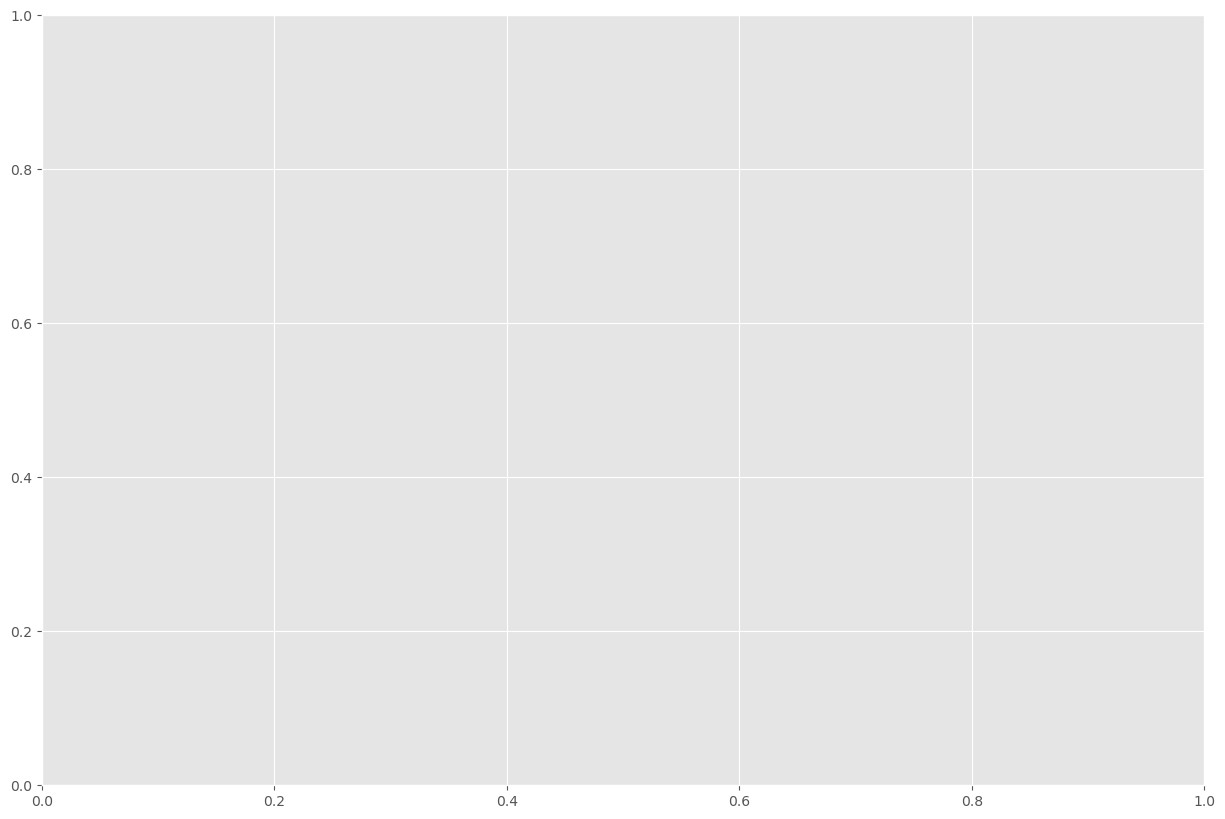

In [27]:
# produces an empty subplot due to current mathplotlib logic
# sorry for that and see https://github.com/matplotlib/matplotlib/issues/18138
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# font = {'family' : 'normal',
#         'size'   : 22}
# plt.rc('font', **font)

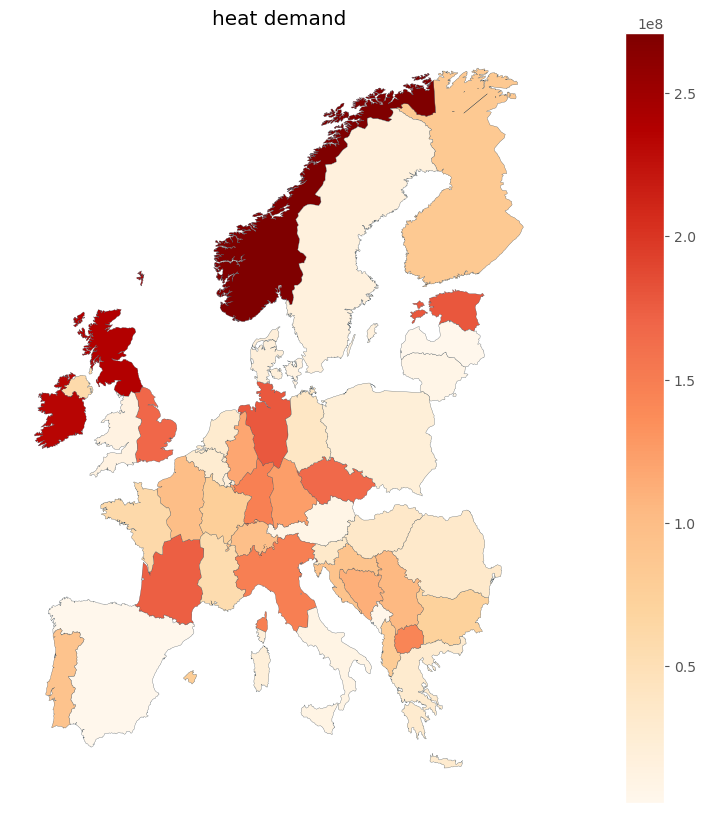

In [28]:
column_name = "heat demand"
fig_name = f"../notebooks/{column_name}.png"
data_gdf.plot(
    column=column_name, 
    legend=True,
    categorical=False,
    cmap='OrRd',
    edgecolor='#36454F',
    linewidth=0.2,
    figsize=(20, 10)
)
plt.title(column_name)
plt.axis("off")
plt.savefig(fig_name, bbox_inches="tight", dpi=200)

# 6. Marginal prices for electricity (Fig. 9)

## 6A. Plot

Text(0.5, 1.0, 'Electricity price during year')

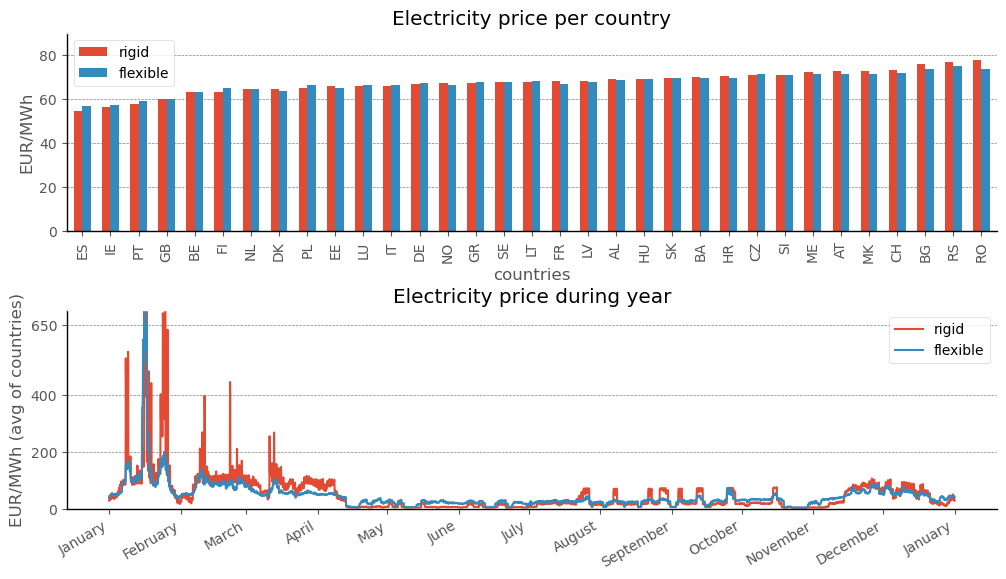

In [29]:
network_two = {"rigid":n_rigid, "flexible":n_flex}
all_prices = pd.DataFrame()
all_annual_cost = pd.DataFrame()

fig, axs = plt.subplots(2, 1, figsize=(12, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot prices per country
for name, n in network_two.items():
#     prices = n.buses_t.marginal_price.groupby(n.buses.country,axis=1).mean().mean().iloc[1:].sort_values()
    prices = n.loads_t.p_set.mul(n.buses_t.marginal_price).sum().groupby(n.buses.country).sum().div(n.loads_t.p_set.groupby(n.buses.country, axis=1).sum().sum()).iloc[1:].sort_values()
    prices.name = name
    all_prices = pd.concat([all_prices, prices], axis=1)

all_prices.plot.bar(ax=axs[0], width=0.6) # plotting bar chart

axs[0].set_yticks([0,20,40,60,80])
axs[0].set_ylim([0, 90])
axs[0].legend(loc="upper left", facecolor="white")
ylabel = axs[0].set_ylabel("EUR/MWh")
xlabel = axs[0].set_xlabel("countries")
axs[0].set_title("Electricity price per country")
axs[0].set_facecolor('white')
axs[0].spines['left'].set_color('black')
axs[0].spines['bottom'].set_color('black')
axs[0].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Plot prices during year
for name, n in network_two.items():
    annual_cost = n.buses_t.marginal_price.mean(axis=1)
    annual_cost.name = name
    all_annual_cost = pd.concat([all_annual_cost, annual_cost], axis=1)
    
A = all_annual_cost.plot(ax=axs[1]) # plotting annual cost variation

axs[1].set_facecolor('white')
axs[1].spines['left'].set_color('black')
axs[1].spines['bottom'].set_color('black')
axs[1].grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
yticks = axs[1].set_yticks([0,200,400,650])
axs[1].set_ylim([0, 700])
lgd = axs[1].legend(loc="upper right", facecolor="white")
date_rng = pd.date_range(start='2013-01-01', periods=13, freq='MS')
axs[1].set_xticks(date_rng)
a = axs[1].set_xticklabels(labels=date_rng.strftime('%B'))
ylabel = axs[1].set_ylabel("EUR/MWh (avg of countries)")
axs[1].set_title("Electricity price during year")